#Improving Computer Vision Accuracy using Convolutions

In computerVision1.ipynb we saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end.

In [1]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
tf.__version__

'2.5.0-rc0'

In [3]:
#loading mnist data set
mnist = tf.keras.datasets.fashion_mnist

In [4]:
#inital training without convolution
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images / 255.0
test_images=test_images / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.6119 - accuracy: 0.7883
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3795 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3346 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3088 - accuracy: 0.8851
Epoch 5/5
313/313 [==============================] - 2s 3ms/step - loss: 0.3465 - accuracy: 0.8735


#Introduction to onvolution

Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.

In [5]:
#loading data
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
training_images.shape

(60000, 28, 28)

In [7]:
training_labels.shape

(60000,)

In [9]:
training_images[0].shape

(28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
training_images[0][3][4]

0

In [26]:
training_images = training_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)
training_images = training_images/255.0
test_images = test_images/255.0

Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
The size of the Convolution, in this case a 3x3 grid
The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
In the first layer, the shape of the input data.
You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way.

In [16]:
#build the model with convolution and pooling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [25]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 46s 23ms/step - loss: 0.1697 - accuracy: 0.9377
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1462 - accuracy: 0.9450
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1282 - accuracy: 0.9516
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1174 - accuracy: 0.9566
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1004 - accuracy: 0.9618


In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 6ms/step - loss: 3.4601 - accuracy: 0.1000


In [28]:
print(test_acc)

0.10000000149011612


#Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [29]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [30]:
test_labels[23]

9

In [31]:
test_labels[28]

9

In [32]:
from matplotlib import pyplot as plt

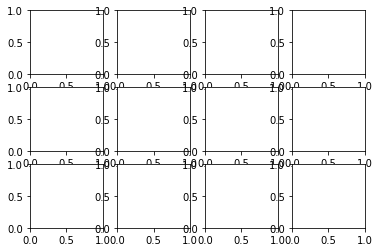

In [33]:
f, axarr = plt.subplots(3,4)

In [34]:
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

In [36]:
len(model.layers)

7

In [37]:
model.layers

In [38]:
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d_3')>

In [39]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

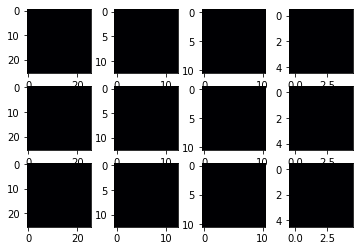

In [43]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 20
#from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines.

In [44]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

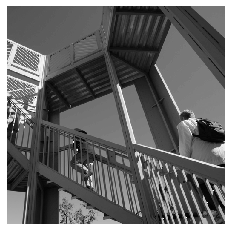

In [46]:
#Next, we can use the pyplot library to draw the image so we know what it looks like.
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [48]:
#The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get #the dimensions of the image so we can loop over it later.
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [49]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

In [50]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

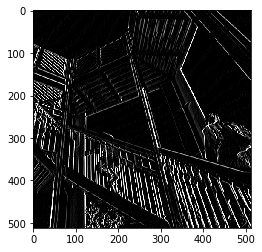

In [51]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

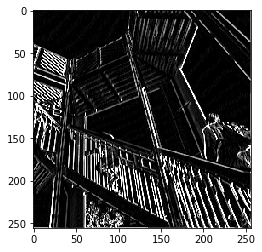

In [52]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    
    

In [1]:
ip = '''raj
        loves
        tgnd'''

In [2]:
type(ip)

str

In [3]:
print(ip)

raj
        loves
        tgnd
